In [1]:
import yaml
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import numpy as np

In [2]:
def read_query_results(filename):
    with open(filename, 'r') as f:
        query_results = yaml.load(f, Loader=yaml.FullLoader)
    return query_results

In [3]:
#filename="./results/ocr_results"
### Using fmp-dorset only the 0000408 dataset
filename="./results/ocr_results_fmp-dorset-classify-mets18-only"
query_results=read_query_results(filename) 

page_quality={}
words_in_dictionary={}
for key,values in query_results.items():
    if key not in page_quality:
        page_quality[key]=[]
        words_in_dictionary[key]=[]
    for v in values:
        if v[0]!=None: 
            page_quality[key].append(v[0])
            rescaling=str(float(v[1])/100)
            words_in_dictionary[key].append(rescaling)

In [4]:
#print(query_results)
print(page_quality[1824])
print(words_in_dictionary[1824])

['0.791', '0.847', '0.788', '0.808', '0.807', '0.802', '0.848', '0.813', '0.789', '0.786', '0.795', '0.746', '0.735', '0.809', '0.773', '0.802', '0.769', '0.808', '0.771', '0.779', '0.696', '0.767', '0.725', '0.601', '0.720', '0.770', '0.772', '0.715', '0.720', '0.784', '0.776', '0.824', '0.815', '0.773', '0.788', '0.813', '0.815', '0.765', '0.731', '0.795', '0.802', '0.811', '0.766', '0.785', '0.776', '0.765', '0.807', '0.774', '0.823', '0.813', '0.750', '0.808', '0.785', '0.705']
['0.76', '0.81', '0.78', '0.77', '0.78', '0.77', '0.76', '0.78', '0.79', '0.78', '0.8', '0.75', '0.76', '0.75', '0.74', '0.78', '0.78', '0.79', '0.75', '0.73', '0.68', '0.69', '0.67', '0.51', '0.66', '0.73', '0.74', '0.67', '0.69', '0.74', '0.76', '0.83', '0.8', '0.8', '0.78', '0.8', '0.78', '0.74', '0.71', '0.83', '0.83', '0.81', '0.78', '0.81', '0.79', '0.77', '0.75', '0.76', '0.74', '0.77', '0.69', '0.81', '0.81', '0.75']


In [5]:
def scatterplot(x_data, y_data, x_label="", y_label="", title="", color = "r", yscale_log=False):

    # Create the plot object
    _, ax = plt.subplots()

    # Plot the data, set the size (s), color and transparency (alpha)
    # of the points
    ax.scatter(x_data, y_data, s = 10, color = color, alpha = 0.75)

    if yscale_log == True:
        ax.set_yscale('log')

    # Label the axes and provide a title
    ax.set_title(title)
    ax.set_xlabel(x_label)
    ax.set_ylabel(y_label)

def barplot(x_data, y_data, error_data, x_label="", y_label="", title=""):
    _, ax = plt.subplots()
    # Draw bars, position them in the center of the tick mark on the x-axis
    ax.bar(x_data, y_data, color = '#539caf', align = 'center')
    # Draw error bars to show standard deviation, set ls to 'none'
    # to remove line between points
    ax.errorbar(x_data, y_data, yerr = error_data, color = '#297083', ls = 'none', lw = 2, capthick = 2)
    ax.set_ylabel(y_label)
    ax.set_xlabel(x_label)
    ax.set_title(title)

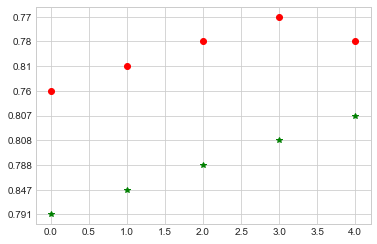

In [6]:
plt.plot(page_quality[1824][0:5],'g*', words_in_dictionary[1824][0:5],'ro') 
plt.show()


In [7]:
cleaned_results = {year: list(filter(lambda x: x[0] is not None, zip(pq, words_in_dictionary[year]))) for year, pq in page_quality.items()}

In [8]:
cleaned_page_quality = {year: np.array([float(x[0]) for x in cr]) for year, cr in cleaned_results.items()}
cleaned_words_in_dict = {year: np.array([float(x[1]) for x in cr]) for year, cr in cleaned_results.items()}

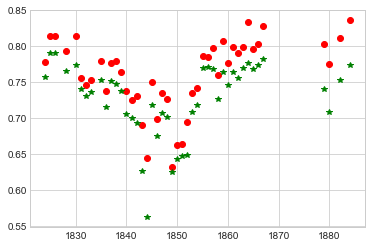

In [9]:
avg_page_quality = [np.average(cleaned_page_quality[k]) for k in sorted(cleaned_page_quality)]
avg_words_in_dict = [np.average(cleaned_words_in_dict[k]) for k in sorted(cleaned_words_in_dict)]
plt.plot(sorted(cleaned_page_quality),avg_page_quality, 'ro', 
         sorted(cleaned_words_in_dict),avg_words_in_dict, 'g*')
plt.show()

In [10]:
std_page_quality = [np.std(cleaned_page_quality[k]) for k in sorted(cleaned_page_quality)]
std_words_in_dict = [np.std(cleaned_words_in_dict[k]) for k in sorted(cleaned_words_in_dict)]

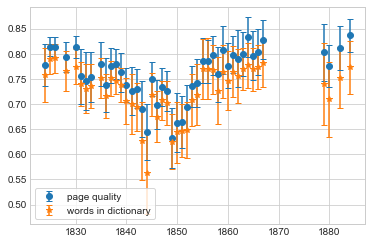

In [11]:
plt.errorbar(cleaned_page_quality.keys(),
             avg_page_quality, 
             std_page_quality, 
             label='page quality',
             linestyle='None', marker='o', capsize=3)
plt.errorbar(cleaned_words_in_dict.keys(),
             avg_words_in_dict, 
             std_words_in_dict, 
             label='words in dictionary',
             linestyle='None', marker='*', capsize=3)
plt.legend(frameon=True, loc=3)
plt.show()